In [ ]:
import sys
print(sys.executable)

In [ ]:
!conda info --envs

In [6]:
!pip install tensorflow

In [7]:
!pip install --upgrade pip

  Obtaining dependency information for pip from https://files.pythonhosted.org/packages/d4/55/90db48d85f7689ec6f81c0db0622d704306c5284850383c090e6c7195a5c/pip-24.2-py3-none-any.whl.metadata
Using cached pip-24.2-py3-none-any.whl (1.8 MB)


ERROR: To modify pip, please run the following command:
C:\Users\ramsu\anaconda3\python.exe -m pip install --upgrade pip


In [1]:
pip install --upgrade tensorflow

Note: you may need to restart the kernel to use updated packages.


In [3]:
 import tensorflow as tf
print(tf.__version__)

2.17.0


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,mean_squared_error,mean_absolute_error,mean_absolute_percentage_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from math import ceil
import datetime as dt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

In [2]:
data = pd.read_csv("SBIN(dataset).csv")

In [3]:
temp = data

In [4]:
data.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,01-01-1996,18.691147,18.978922,18.540184,18.823240,12.409931,43733533.0
1,02-01-1996,18.894005,18.964767,17.738192,18.224106,12.014931,56167280.0
2,03-01-1996,18.327892,18.568489,17.643839,17.738192,11.694577,68296318.0
3,04-01-1996,17.502312,17.832542,17.223972,17.676863,11.654142,86073880.0
4,05-01-1996,17.738192,17.785366,17.459852,17.577793,11.588827,76613039.0
5,08-01-1996,17.478724,17.643839,16.922047,17.063574,11.249807,55395172.0
6,09-01-1996,16.889023,18.681711,16.705036,17.997660,11.865635,82057540.0
7,10-01-1996,17.407959,17.714603,17.054138,17.172079,11.321342,54360749.0
8,11-01-1996,16.983376,17.926895,16.983376,17.827826,11.753670,65973105.0
9,12-01-1996,17.879719,18.233540,17.573074,17.837261,11.759888,102152486.0


In [5]:
temp.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,01-01-1996,18.691147,18.978922,18.540184,18.823240,12.409931,43733533.0
1,02-01-1996,18.894005,18.964767,17.738192,18.224106,12.014931,56167280.0
2,03-01-1996,18.327892,18.568489,17.643839,17.738192,11.694577,68296318.0
3,04-01-1996,17.502312,17.832542,17.223972,17.676863,11.654142,86073880.0
4,05-01-1996,17.738192,17.785366,17.459852,17.577793,11.588827,76613039.0
5,08-01-1996,17.478724,17.643839,16.922047,17.063574,11.249807,55395172.0
6,09-01-1996,16.889023,18.681711,16.705036,17.997660,11.865635,82057540.0
7,10-01-1996,17.407959,17.714603,17.054138,17.172079,11.321342,54360749.0
8,11-01-1996,16.983376,17.926895,16.983376,17.827826,11.753670,65973105.0
9,12-01-1996,17.879719,18.233540,17.573074,17.837261,11.759888,102152486.0


Text(0.5, 1.0, 'Stock Price of Microsoft over the Years')

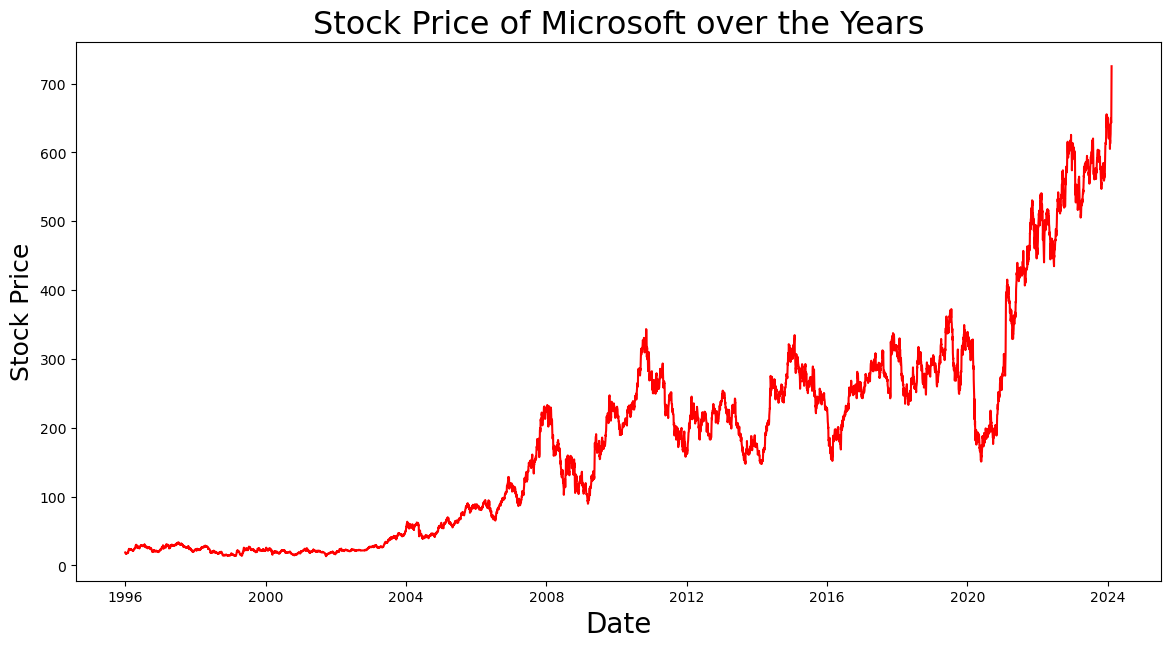

In [6]:
data['Date'] = pd.to_datetime(data.Date,format='%d-%m-%Y')
data.index = data['Date']
plt.figure(figsize=(14,7))
plt.plot(data['Close'], label='Close Price history',color='r')
plt.xlabel('Date',size=20)
plt.ylabel('Stock Price',size=18)
plt.title('Stock Price of Microsoft over the Years',size=23)

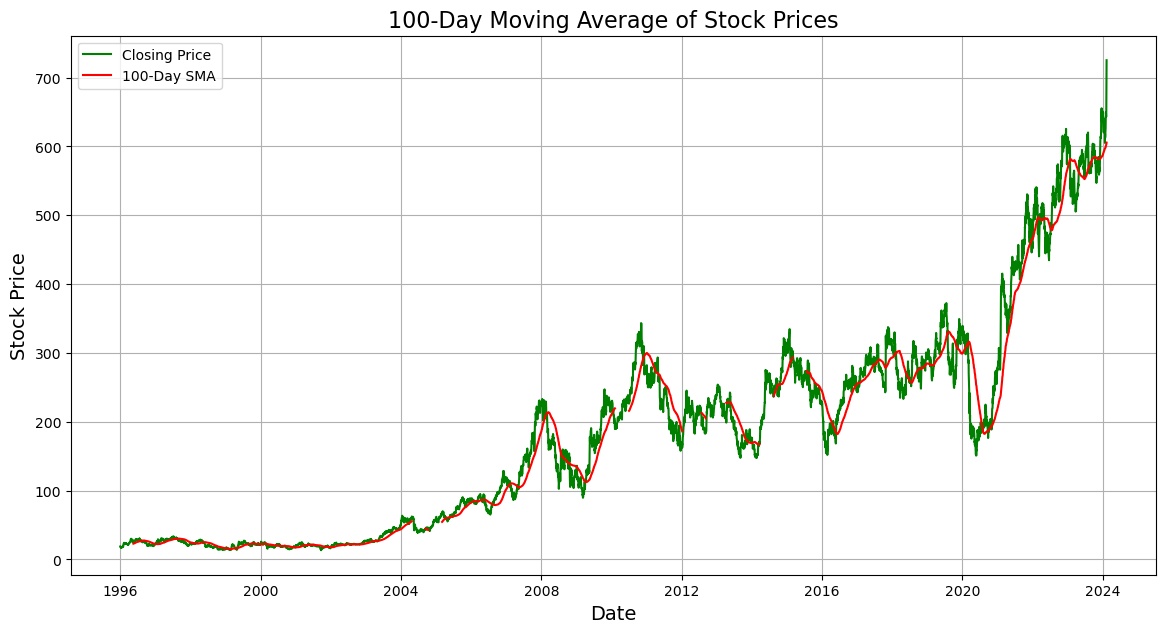

In [7]:
#  Convert the 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')

# Calculate the moving average with a window of 50 days
window_size = 100
data['SMA'] = data['Close'].rolling(window=window_size).mean()

# Plotting the Closing Prices and Moving Average
plt.figure(figsize=(14, 7))
plt.plot(data['Date'], data['Close'], label='Closing Price', color='green')
plt.plot(data['Date'], data['SMA'], label=f'{window_size}-Day SMA', color='red')
plt.xlabel('Date', size=14)
plt.ylabel('Stock Price', size=14)
plt.title(f'{window_size}-Day Moving Average of Stock Prices', size=16)
plt.legend()
plt.grid(True)
plt.show()

Here the attributes "Adj Close" and "Volume" are not required.

Hence we drop those columns to reduce complexity

In [8]:
data.drop(['Date', 'Adj Close'], axis=1,inplace=True)

In [9]:
data.head(5)

,Open,High,Low,Close,Volume,SMA
Date,,,,,,
1996-01-01,18.691147,18.978922,18.540184,18.823240,43733533.0,NaN
1996-01-02,18.894005,18.964767,17.738192,18.224106,56167280.0,NaN
1996-01-03,18.327892,18.568489,17.643839,17.738192,68296318.0,NaN
1996-01-04,17.502312,17.832542,17.223972,17.676863,86073880.0,NaN
1996-01-05,17.738192,17.785366,17.459852,17.577793,76613039.0,NaN


In [10]:
temp.drop(['SMA'],axis=1,inplace=True)

In [11]:
temp.head(3)

,Open,High,Low,Close,Volume
Date,,,,,
1996-01-01,18.691147,18.978922,18.540184,18.823240,43733533.0
1996-01-02,18.894005,18.964767,17.738192,18.224106,56167280.0
1996-01-03,18.327892,18.568489,17.643839,17.738192,68296318.0


Now checking if there were any missing values to handle them.

In [12]:
data.isnull().sum()

Open      9
High      9
Low       9
Close     9
Volume    9
dtype: int64

There were null values in every column.
So replacing those null values with mean of that column(Because each column is of numerical datatype)

In [13]:
temp1 = data.copy()  # Create a copy to avoid modifying the original
temp1['Open'] = temp1['Open'].fillna(data['Open'].mean(), inplace=False)
temp1.head(10)

,Open,High,Low,Close,Volume
Date,,,,,
1996-01-01,18.691147,18.978922,18.540184,18.823240,43733533.0
1996-01-02,18.894005,18.964767,17.738192,18.224106,56167280.0
1996-01-03,18.327892,18.568489,17.643839,17.738192,68296318.0
1996-01-04,17.502312,17.832542,17.223972,17.676863,86073880.0
1996-01-05,17.738192,17.785366,17.459852,17.577793,76613039.0
1996-01-08,17.478724,17.643839,16.922047,17.063574,55395172.0
1996-01-09,16.889023,18.681711,16.705036,17.997660,82057540.0
1996-01-10,17.407959,17.714603,17.054138,17.172079,54360749.0
1996-01-11,16.983376,17.926895,16.983376,17.827826,65973105.0


In [14]:
temp1.isnull().sum()

Open      0
High      9
Low       9
Close     9
Volume    9
dtype: int64

In [15]:
temp2 = temp1.copy()  # Create a copy to avoid modifying the original
temp2['High'] = temp2['High'].fillna(temp1['High'].mean(), inplace=False)
temp2.head(10)

,Open,High,Low,Close,Volume
Date,,,,,
1996-01-01,18.691147,18.978922,18.540184,18.823240,43733533.0
1996-01-02,18.894005,18.964767,17.738192,18.224106,56167280.0
1996-01-03,18.327892,18.568489,17.643839,17.738192,68296318.0
1996-01-04,17.502312,17.832542,17.223972,17.676863,86073880.0
1996-01-05,17.738192,17.785366,17.459852,17.577793,76613039.0
1996-01-08,17.478724,17.643839,16.922047,17.063574,55395172.0
1996-01-09,16.889023,18.681711,16.705036,17.997660,82057540.0
1996-01-10,17.407959,17.714603,17.054138,17.172079,54360749.0
1996-01-11,16.983376,17.926895,16.983376,17.827826,65973105.0


In [16]:
temp2.isnull().sum()

Open      0
High      0
Low       9
Close     9
Volume    9
dtype: int64

In [17]:
temp3 = temp2.copy()  # Create a copy to avoid modifying the original
temp3['Low'] = temp3['Low'].fillna(temp2['Low'].mean(), inplace=False)
temp3.head(10)

,Open,High,Low,Close,Volume
Date,,,,,
1996-01-01,18.691147,18.978922,18.540184,18.823240,43733533.0
1996-01-02,18.894005,18.964767,17.738192,18.224106,56167280.0
1996-01-03,18.327892,18.568489,17.643839,17.738192,68296318.0
1996-01-04,17.502312,17.832542,17.223972,17.676863,86073880.0
1996-01-05,17.738192,17.785366,17.459852,17.577793,76613039.0
1996-01-08,17.478724,17.643839,16.922047,17.063574,55395172.0
1996-01-09,16.889023,18.681711,16.705036,17.997660,82057540.0
1996-01-10,17.407959,17.714603,17.054138,17.172079,54360749.0
1996-01-11,16.983376,17.926895,16.983376,17.827826,65973105.0


In [18]:
temp3.isnull().sum()

Open      0
High      0
Low       0
Close     9
Volume    9
dtype: int64

In [19]:
temp4 = temp3.copy()  # Create a copy to avoid modifying the original
temp4['Close'] = temp4['High'].fillna(temp3['High'].mean(), inplace=False)
temp4.head(10)

,Open,High,Low,Close,Volume
Date,,,,,
1996-01-01,18.691147,18.978922,18.540184,18.978922,43733533.0
1996-01-02,18.894005,18.964767,17.738192,18.964767,56167280.0
1996-01-03,18.327892,18.568489,17.643839,18.568489,68296318.0
1996-01-04,17.502312,17.832542,17.223972,17.832542,86073880.0
1996-01-05,17.738192,17.785366,17.459852,17.785366,76613039.0
1996-01-08,17.478724,17.643839,16.922047,17.643839,55395172.0
1996-01-09,16.889023,18.681711,16.705036,18.681711,82057540.0
1996-01-10,17.407959,17.714603,17.054138,17.714603,54360749.0
1996-01-11,16.983376,17.926895,16.983376,17.926895,65973105.0


In [20]:
temp4.isnull().sum()

Open      0
High      0
Low       0
Close     0
Volume    9
dtype: int64

In [21]:
temp5 = temp4.copy()  # Create a copy to avoid modifying the original
temp5['Volume'] = temp5['Volume'].fillna(temp4['Volume'].mean(), inplace=False)
temp5.head(10)

,Open,High,Low,Close,Volume
Date,,,,,
1996-01-01,18.691147,18.978922,18.540184,18.978922,43733533.0
1996-01-02,18.894005,18.964767,17.738192,18.964767,56167280.0
1996-01-03,18.327892,18.568489,17.643839,18.568489,68296318.0
1996-01-04,17.502312,17.832542,17.223972,17.832542,86073880.0
1996-01-05,17.738192,17.785366,17.459852,17.785366,76613039.0
1996-01-08,17.478724,17.643839,16.922047,17.643839,55395172.0
1996-01-09,16.889023,18.681711,16.705036,18.681711,82057540.0
1996-01-10,17.407959,17.714603,17.054138,17.714603,54360749.0
1996-01-11,16.983376,17.926895,16.983376,17.926895,65973105.0


In [22]:
temp5.isnull().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [23]:
df = temp5

In [24]:
df.isnull().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [25]:
df.shape

(7074, 5)

In [26]:
df.describe()

,Open,High,Low,Close,Volume
count,7074.000000,7074.000000,7074.000000,7074.000000,7.074000e+03
mean,180.682841,183.085167,177.998209,183.085167,3.130217e+07
std,154.674728,156.245577,152.883155,156.245577,3.460540e+07
min,13.478195,13.935802,13.214009,13.935802,0.000000e+00
25%,28.494329,28.871737,28.054413,28.871737,1.299895e+07
50%,173.500000,176.849998,170.559998,176.849998,2.065405e+07
75%,265.175010,268.864998,261.200012,268.864998,3.650682e+07
max,703.650024,728.349976,694.200012,728.349976,4.469483e+08


In [27]:
# Select features and target variable
X = df[['Open', 'High', 'Low', 'Volume']]   #Features
y = df['Close']  #Target variables

In [28]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=60)

In [29]:
X_train.shape

(4951, 4)

In [30]:
y_train.shape

(4951,)

Scaling : 

In [31]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Linear Regression

In [32]:
model1 = LinearRegression()

In [33]:
model1.fit(X_train,y_train)

LinearRegression()

In [34]:
y_pred1 = model1.predict(X_test)

In [35]:
y_pred1

array([ 19.74788997, 302.79998803, 481.39999398, ...,  79.83601398,
       197.44999698,  19.38935302])

In [36]:
accuracy1 = accuracy_score(y_test > y_pred1, y_test > y_pred1.round())
accuracy1

0.4894017899199246

In [37]:
temp_rmse1 = np.sqrt(mean_squared_error(y_test, y_pred1))
rmse1 = "{:.20f}".format(temp_rmse1)
rmse1

'0.00000003638770126241'

In [38]:
mse1 = mean_squared_error(y_test, y_pred1)
mse1

1.3240648031621122e-15

In [39]:
temp_mae1 = mean_absolute_error(y_test, y_pred1)
mae1 = "{:.20f}".format(temp_mae1)
mae1

'0.00000002203548985212'

In [40]:
temp_mape1 = mean_absolute_percentage_error(y_test, y_pred1)
mape1 = "{:.20f}".format(temp_mape1)
mape1

'0.00000000052518336538'

In [41]:
confusion1 = confusion_matrix(y_test > y_pred1, y_test > y_pred1.round())
print(confusion1)

[[369 310]
 [774 670]]


In [45]:
report1 = classification_report(y_test > y_pred1, y_test > y_pred1.round())
print(report1)

              precision    recall  f1-score   support

       False       0.32      0.54      0.41       679
        True       0.68      0.46      0.55      1444

    accuracy                           0.49      2123
   macro avg       0.50      0.50      0.48      2123
weighted avg       0.57      0.49      0.51      2123



Accuracy is very less when we use Linear Regression model.

So we can use another model.

Random Forest

In [131]:
model2 = RandomForestRegressor()

In [132]:
model2.fit(X_train, y_train)

RandomForestRegressor()

In [133]:
y_pred2 = model2.predict(X_test)

In [134]:
y_pred2

array([ 19.7410508 , 302.74650804, 481.4199958 , ...,  79.70793279,
       197.45434916,  19.38430445])

In [135]:
accuracy2 = accuracy_score(y_test > y_pred2, y_test > y_pred2.round())
accuracy2

0.5595854922279793

In [136]:
rmse2 = np.sqrt(mean_squared_error(y_test, y_pred2))
rmse2

0.8057390932901167

In [236]:
mse2 = mean_squared_error(y_test, y_pred2)
mse2

0.6492154864559795

In [137]:
mae2 = mean_absolute_error(y_test, y_pred2)
mae2

0.12195369792570733

In [138]:
mape2 = mean_absolute_percentage_error(y_test, y_pred2)
mape2

0.0006070869515755048

In [139]:
confusion2 = confusion_matrix(y_test > y_pred2, y_test > y_pred2.round())
print(confusion2)

[[613 386]
 [549 575]]


In [140]:
report2 = classification_report(y_test > y_pred2, y_test > y_pred2.round())
print(report2)

              precision    recall  f1-score   support

       False       0.53      0.61      0.57       999
        True       0.60      0.51      0.55      1124

    accuracy                           0.56      2123
   macro avg       0.56      0.56      0.56      2123
weighted avg       0.57      0.56      0.56      2123



Accuracy is very less when we use Random Forest model.

So we can use another model.

LSTM

In [141]:
# Reshape the input data for LSTM
n_features = X_train_scaled.shape[1]
n_steps = 10
n_samples_train = X_train_scaled.shape[0] - n_steps + 1
n_samples_test = X_test_scaled.shape[0] - n_steps + 1


In [142]:
# Reshape the input data
X_train_reshaped = np.array([X_train_scaled[i:i+n_steps, :] for i in range(n_samples_train)])
X_test_reshaped = np.array([X_test_scaled[i:i+n_steps, :] for i in range(n_samples_test)])

In [143]:
model3 = Sequential()
model3.add(LSTM(64, activation='relu', input_shape=(n_steps, n_features)))
model3.add(Dense(1))

C:\Users\ramsu\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [144]:
model3.compile(loss='mean_squared_error', optimizer='adam')

In [145]:
model3.fit(X_train_reshaped, y_train[n_steps-1:], epochs=100, batch_size=32, verbose=0)

In [146]:
# Make predictions on the test set
y_pred3 = model3.predict(X_test_reshaped).flatten()

67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


In [147]:
y_pred3

array([ 37.215496, 284.18472 , 271.1025  , ...,  78.30091 , 197.7962  ,
        30.50407 ], dtype=float32)

In [148]:
#Matching the lengths of test and predict
y_test_trimmed = y_test[n_steps-1:len(y_pred2)+n_steps-1]

In [149]:
accuracy3 = accuracy_score(y_test_trimmed > y_pred3, y_test_trimmed > y_pred3.round())
print(accuracy3)

0.9943235572374646


In [150]:
rmse3 = np.sqrt(mean_squared_error(y_test[n_steps-1:], y_pred3))
rmse3

13.449207209131883

In [237]:
mse3 = mean_squared_error(y_test[n_steps-1:], y_pred3)
mse3

180.881174554165

In [151]:
mape3 = mean_absolute_percentage_error(y_test[n_steps-1:], y_pred3)
mape3

0.17058405841657356

In [152]:
mae3 = mean_absolute_error(y_test[n_steps-1:], y_pred3)
mae3


10.564402049242721

In [153]:
confusion3 = confusion_matrix(y_test_trimmed > y_pred3, y_test_trimmed > y_pred3.round())
print(confusion3)

[[1537    5]
 [   7  565]]


In [154]:
# Classification report
report3 = classification_report(y_test_trimmed > y_pred3, y_test_trimmed > y_pred3.round())
print(report3)

              precision    recall  f1-score   support

       False       1.00      1.00      1.00      1542
        True       0.99      0.99      0.99       572

    accuracy                           0.99      2114
   macro avg       0.99      0.99      0.99      2114
weighted avg       0.99      0.99      0.99      2114



ANN

In [155]:
# Create an ANN model
model4 = Sequential()
model4.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],)))
model4.add(Dense(16, activation='relu'))
model4.add(Dense(1, activation='linear'))

C:\Users\ramsu\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [156]:
model4.compile(loss='mean_squared_error', optimizer='adam')

In [157]:
model4.fit(X_train_scaled, y_train, epochs=100, batch_size=32, verbose=0)

In [162]:
# Make predictions on the test set
y_pred4 = model4.predict(X_test_scaled).flatten()

67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [165]:
accuracy4 = accuracy_score(y_test > y_pred4, y_test > y_pred4.round())
accuracy4

0.9109750353273669

In [163]:
rmse4 = np.sqrt(mean_squared_error(y_test, y_pred4))
rmse4

1.7249180891172395

In [238]:
mse4 = mean_squared_error(y_test, y_pred4)
mse4

2.975342414163869

In [167]:
mae4 = mean_absolute_error(y_test, y_pred4)
mae4

1.114281727044576

In [168]:
mape4 = mean_absolute_percentage_error(y_test, y_pred4)
mape4

0.011318133808514553

SVM

In [177]:
model5 = SVR()

In [179]:
model5.fit(X_train, y_train)

SVR()

In [180]:
y_pred5 = model5.predict(X_test)

In [181]:
y_pred5

array([172.49389396,  63.96740989, 199.88306743, ..., 202.57144409,
       202.81262889,  92.38113758])

In [189]:
rmse5 = np.sqrt(mean_squared_error(y_test,y_pred5))
rmse5

148.58276636502907

In [239]:
mse5 = mean_squared_error(y_test,y_pred5)
mse5

22076.838460684812

In [183]:
mae5 = mean_absolute_error(y_test, y_pred5)
mae5

111.18289027400783

In [184]:
mape5 = mean_absolute_percentage_error(y_test, y_pred5)
mape5

1.8021714525984205

In [185]:
accuracy5 = accuracy_score(y_test >y_pred2, y_test > y_pred5.round())
accuracy5

0.526613283089967

Decision Tree(CART algorithm)

In [199]:
model6 = DecisionTreeRegressor()

In [200]:
# Train the model
model6.fit(X_train, y_train)

DecisionTreeRegressor()

In [202]:
# Make predictions on the test set
y_pred6 = model6.predict(X_test)

In [203]:
y_pred6

array([ 19.719585, 302.700012, 481.5     , ...,  79.425583, 197.5     ,
        19.370481])

In [204]:
rmse6 = np.sqrt(mean_squared_error(y_test, pred6))
rmse6

0.4271632912767553

In [240]:
mse6 = mean_squared_error(y_test, pred6)
mse6

0.18246847741439007

In [205]:
mae6 = mean_absolute_error(y_test, y_pred6)
mae6

0.1424990527555344

In [206]:
mape6 = mean_absolute_percentage_error(y_test, y_pred6)
mape6

0.0007818566511832535

In [208]:
accuracy6 = accuracy_score(y_test > y_pred6, y_test > y_pred6.round())
accuracy6

0.5883184173339614

KNN

In [215]:
model7 = KNeighborsRegressor()

In [219]:
model7.fit(X_train, y_train)

KNeighborsRegressor()

In [220]:
y_pred7 = model7.predict(X_test)

In [221]:
y_pred7

array([ 20.8338832,  73.6396336, 273.522752 , ..., 295.6624312,
       202.9540008,  55.757354 ])

In [222]:
rmse7 = np.sqrt(mean_squared_error(y_test, y_pred7))
rmse7

152.25907733897313

In [241]:
mse7 = mean_squared_error(y_test, y_pred7)
mse7

23182.826632115397

In [223]:
mae7 = mean_absolute_error(y_test, y_pred7)
mae7

114.02716038304285

In [224]:
mape7 = mean_absolute_percentage_error(y_test, y_pred7)
mape7

1.7140694360060023

In [226]:
accuracy7 = accuracy_score(y_test > y_pred7, y_test > y_pred7.round())
accuracy7

0.9915214319359397

Comparing all evaluation Metrics:

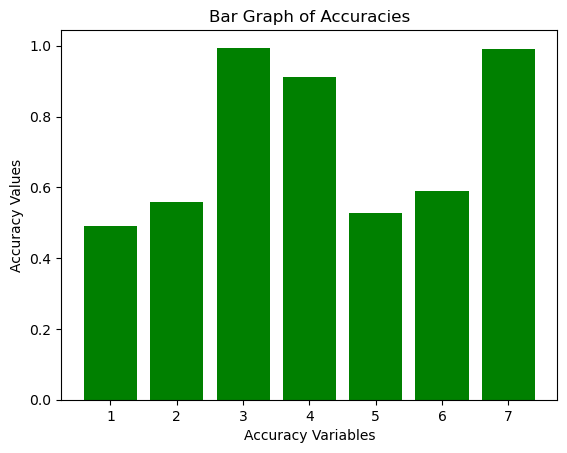

In [234]:
accuracies = [accuracy1,accuracy2,accuracy3,accuracy4,accuracy5,accuracy6,accuracy7]

# List of corresponding labels for each accuracy
labels = ['1', '2', '3','4','5','6','7']

# Plotting the bar graph
plt.bar(labels, accuracies, color='green')
plt.xlabel('Accuracy Variables')
plt.ylabel('Accuracy Values')
plt.title('Bar Graph of Accuracies')
plt.show()

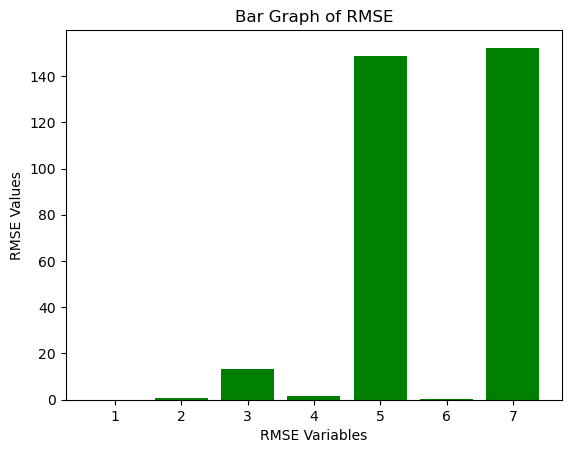

In [233]:
rmse = [float(rmse1),rmse2,rmse3,rmse4,rmse5,rmse6,rmse7]

# List of corresponding labels for each accuracy
labels = ['1', '2', '3','4','5','6','7']

# Plotting the bar graph
plt.bar(labels,rmse, color='green')
plt.xlabel('RMSE Variables')
plt.ylabel('RMSE Values')
plt.title('Bar Graph of RMSE')
plt.show()

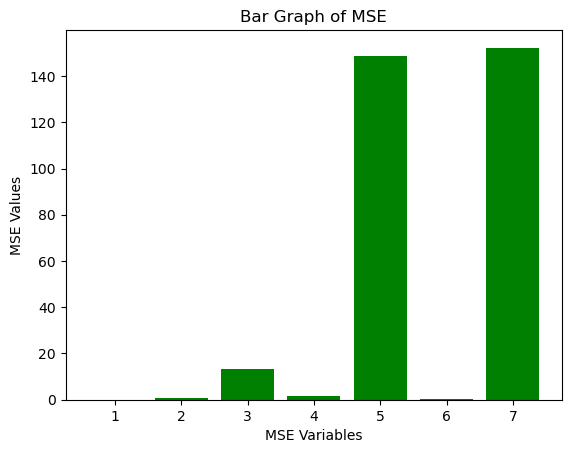

In [247]:
mse = [float(mse1),mse2,mse3,mse4,mse5,mse6,mse7]

# List of corresponding labels for each accuracy
labels = ['1', '2', '3','4','5','6','7']

# Plotting the bar graph
plt.bar(labels,rmse, color='green')
plt.xlabel('MSE Variables')
plt.ylabel('MSE Values')
plt.title('Bar Graph of MSE')
plt.show()

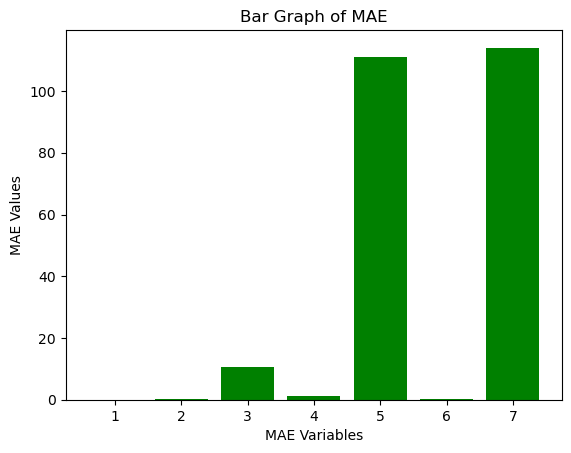

In [232]:
mae = [float(mae1),mae2,mae3,mae4,mae5,mae6,mae7]

# List of corresponding labels for each accuracy
labels = ['1', '2', '3','4','5','6','7']

# Plotting the bar graph
plt.bar(labels,mae, color='green')
plt.xlabel('MAE Variables')
plt.ylabel('MAE Values')
plt.title('Bar Graph of MAE')
plt.show()

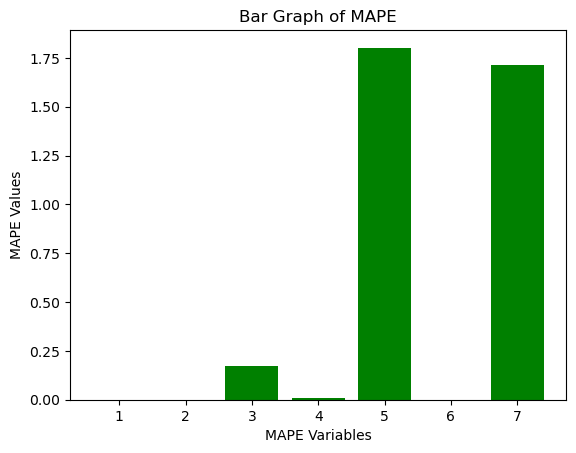

In [231]:
mape = [float(mape1),mape2,mape3,mape4,mape5,mape6,mape7]

# List of corresponding labels for each accuracy
labels = ['1', '2', '3','4','5','6','7']

# Plotting the bar graph
plt.bar(labels,mape, color='green')
plt.xlabel('MAPE Variables')
plt.ylabel('MAPE Values')
plt.title('Bar Graph of MAPE')
plt.show()